In [253]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
df=pd.read_csv("HW1 clv_transactions.csv")

In [172]:
df_copy=df.copy(deep=True)

## Step 1: Understand the dataset

### 1. Missing Values in the Dataset

<Figure size 720x432 with 0 Axes>

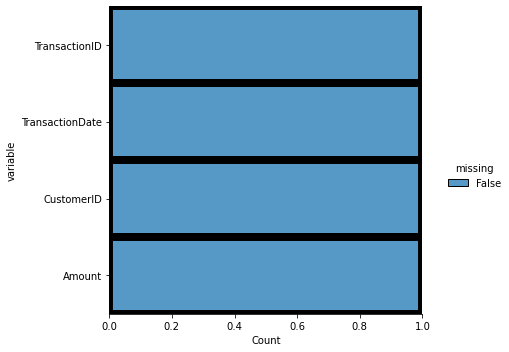

In [173]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

In [174]:
print(sum(df.isna()["TransactionID"]))
print(sum(df.isna()["TransactionDate"]))
print(sum(df.isna()["CustomerID"]))
print(sum(df.isna()["Amount"]))
print("Hence, there are no missing values in the dataset")

0
0
0
0
Hence, there are no missing values in the dataset


### 2. Range of dates

In [177]:
df_copy["TransactionDate"]=pd.to_datetime(df_copy["TransactionDate"])
for i in range(len(df)):
    df["TransactionDate"].iloc[i]=df_copy["TransactionDate"].iloc[i].date()

In [176]:
print("The range of dates is:",df["TransactionDate"].min(),"to",df["TransactionDate"].max())

The range of dates is: 2010-01-04 to 2015-12-31


### 3. Unique Customers in Dataset

In [178]:
print("There are",len(df["CustomerID"].value_counts()),"unique customers in the dataset")

There are 1000 unique customers in the dataset


### 4.  Standard descriptive statistics for the Amount field

In [179]:
df["Amount"].describe()

count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64

In [180]:
print("The minimum transaction amount is:",df["Amount"].min())
print("The maximum transaction amount is:",df["Amount"].max())
print("The variance of the Amount is:","{:.2f}".format(df["Amount"].var()))
print("The standard deviation of the Amount is:","{:.2f}".format(df["Amount"].std()))

The minimum transaction amount is: -1.0
The maximum transaction amount is: 2033.0
The variance of the Amount is: 1499.54
The standard deviation of the Amount is: 38.72


### 5. Transaction Amount over time

<AxesSubplot:xlabel='TransactionDate', ylabel='Amount'>

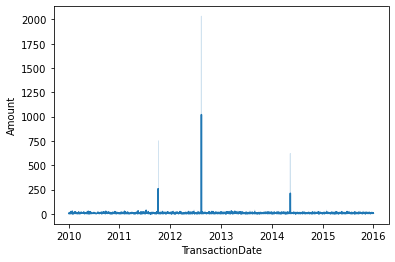

In [181]:
sns.lineplot(data=df,x="TransactionDate",y="Amount")

### The lineplot above is not very indicative of any trend. Perhaps the presence of outliers/extortionate transaction values in 2011, 2012 and 2014 is masking the underlying trend. Analysing further, we can find the median transaction value for each year.

In [182]:
TransactionYear=[]
for i,date in enumerate(df["TransactionDate"]):
    TransactionYear.append(df["TransactionDate"][i].year)
    
df["TransactionYear"]=TransactionYear
df.groupby(["TransactionYear"])["Amount"].median()

TransactionYear
2010    7.89
2011    6.79
2012    7.13
2013    7.26
2014    6.45
2015    6.68
Name: Amount, dtype: float64

<AxesSubplot:xlabel='TransactionYear'>

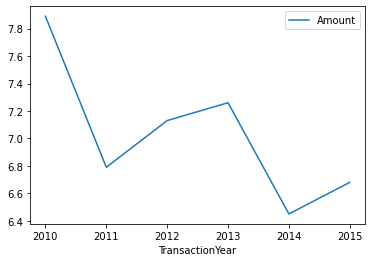

In [183]:
df.groupby(["TransactionYear"])["Amount"].median().plot(legend=True)

### Transaction amounts do not seem to be increasing over time. I would conclude that there is no particular trend.

## Step 2: Explore the dataset

Text(0, 0.5, 'Frequency')

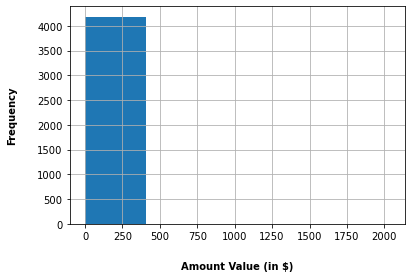

In [154]:
df["Amount"].hist(bins=5).plot()
plt.xlabel("Amount Value (in $)", labelpad=20, weight='bold', size=10)

plt.ylabel("Frequency", labelpad=20, weight='bold', size=10)

#### Now, magnifying to the outlier values - 

Text(0, 0.5, 'Frequency')

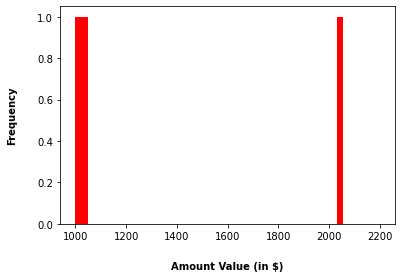

In [159]:
plt.hist(df['Amount'], 50, range=[1000, 2200], facecolor='red', align='mid')
plt.xlabel("Amount Value (in $)", labelpad=20, weight='bold', size=10)

plt.ylabel("Frequency", labelpad=20, weight='bold', size=10)

#### Looking at the top 10 transaction amounts in our dataset:

In [131]:
df.nlargest(10,"Amount")

,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear
4177,4178,2012-08-13,1000,2033.00,2012
211,212,2014-05-14,54,1027.00,2014
23,24,2011-10-07,7,1003.00,2011
2760,2761,2013-08-31,691,38.35,2013
263,264,2012-06-21,69,38.29,2012
54,55,2015-01-29,13,37.27,2015
2490,2491,2011-07-13,632,36.94,2011
2273,2274,2013-04-13,573,32.81,2013
2644,2645,2011-05-16,663,31.40,2011
585,586,2013-03-16,145,30.43,2013


#### The top 3 transactions could either be possible errors in data entry or legitimate but rare transactions. If they are rare, legitimate transactions, with a high likelihood of occuring again in the future, we could have either kept the transaction or capped its value at a reasonable rate like 500 dollars. However, looking at the data, it doesn't seem like the transactions will repeat, hence, it makes sense to remove them entirely.

In [160]:
df.nsmallest(10,"Amount")

,TransactionID,TransactionDate,CustomerID,Amount
49,50,2012-05-12,13,-1.00
3326,3327,2014-01-16,811,-1.00
2175,2176,2015-03-11,544,0.01
2511,2512,2013-02-07,636,0.01
1467,1468,2015-01-06,373,0.02
2139,2140,2013-08-29,533,0.03
2923,2924,2010-05-24,717,0.03
152,153,2015-06-07,37,0.04
388,389,2013-07-09,95,0.05
594,595,2015-04-20,149,0.05


#### The two transactions with negative amounts seem to be an error. We should also remove these from the dataset

In [184]:
df.drop(df[df['Amount'] > 1000].index, inplace = True)
df.drop(df[df['Amount']<0].index,inplace=True)

### Now, replotting the amount vs time line plot

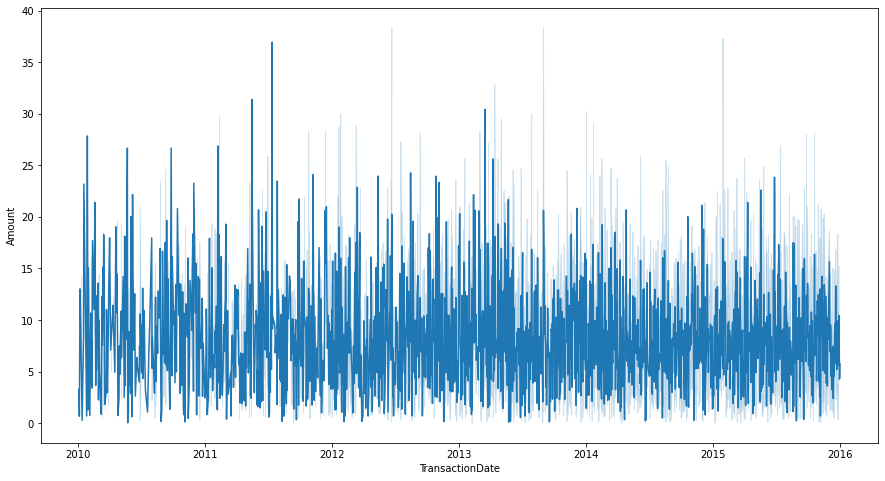

In [139]:
sns.lineplot(data=df,x="TransactionDate",y="Amount")
plt.gcf().set_size_inches(15, 8)

### Again, there does not seem to be an increasing trend in the transaction value over time.

### We can also use the IQR method to detect and remove outliers in the data

In [185]:
Q1=df["Amount"].quantile(0.25)
Q3=df["Amount"].quantile(0.75)
IQR=Q3-Q1

df[(df["Amount"]<(Q1-1.5*IQR)) | (df["Amount"]>(Q3+1.5*IQR))]

,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear
54,55,2015-01-29,13,37.27,2015
62,63,2012-01-21,14,28.72,2012
136,137,2014-02-15,34,25.60,2014
165,166,2014-01-20,41,29.12,2014
263,264,2012-06-21,69,38.29,2012
...,...,...,...,...,...
3778,3779,2015-09-26,914,28.03,2015
3883,3884,2015-04-01,941,25.69,2015
3964,3965,2013-07-28,957,30.01,2013
3998,3999,2012-09-11,963,28.13,2012


### Hence, according to the IQR method, 62 transactions are considered as outliers. However, plotting their distribution gives us enough confidence in our assertion that these transactions can be retained.

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

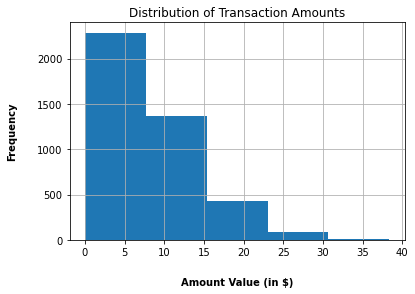

In [186]:
df["Amount"].hist(bins=5).plot()
plt.xlabel("Amount Value (in $)", labelpad=20, weight='bold', size=10)

plt.ylabel("Frequency", labelpad=20, weight='bold', size=10)

plt.title("Distribution of Transaction Amounts")

### Step 3: Determine origin year of customers

In [194]:
Earliest_Transaction_Date=df.groupby(["CustomerID"])["TransactionDate"].min()

In [221]:
Earliest_Transaction_Date=Earliest_Transaction_Date.to_frame()

In [223]:
Earliest_Transaction_Date.reset_index(inplace=True)

In [225]:
Earliest_Transaction_Date.rename(columns={'TransactionDate': 'EarliestTransactionDate'}, inplace=True)

In [263]:
Earliest_Transaction_Year=[]

for i in range(len(df)):
    for j in range(len(Earliest_Transaction_Date)):
        if df["CustomerID"].iloc[i]==Earliest_Transaction_Date["CustomerID"].iloc[j]:
            Earliest_Transaction_Year.append(Earliest_Transaction_Date["EarliestTransactionDate"][j].year)
            break

df["CustomerAcquisitionYear"]=Earliest_Transaction_Year

In [269]:
df.drop(['CustomerAcquistionYear'], axis=1,inplace=True)

In [270]:
df.head(5)

,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear,CustomerAcquisitionYear
0,1,2012-09-04,1,20.26,2012,2012
1,2,2012-05-15,2,10.87,2012,2012
2,3,2014-05-23,2,2.21,2014,2012
3,4,2014-10-24,2,10.48,2014,2012
4,5,2012-10-13,2,3.94,2012,2012


### Step 4: Calculate cumulative transaction amounts

In [317]:
Origin_2010_Cum_Amounts=[]

Origin_2010_Cum_Amounts.append(df[(df["TransactionDate"]>=datetime.date(2010,1,1)) & (df["TransactionDate"]<=datetime.date(2010,12,31))]["Amount"].sum())
Origin_2010_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2010) & (df["TransactionDate"]>=datetime.date(2010,1,1)) & (df["TransactionDate"]<=datetime.date(2011,12,31))]["Amount"].sum())
Origin_2010_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2010) & (df["TransactionDate"]>=datetime.date(2010,1,1)) & (df["TransactionDate"]<=datetime.date(2012,12,31))]["Amount"].sum())
Origin_2010_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2010) & (df["TransactionDate"]>=datetime.date(2010,1,1)) & (df["TransactionDate"]<=datetime.date(2013,12,31))]["Amount"].sum())
Origin_2010_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2010) & (df["TransactionDate"]>=datetime.date(2010,1,1)) & (df["TransactionDate"]<=datetime.date(2014,12,31))]["Amount"].sum())
Origin_2010_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2010) & (df["TransactionDate"]>=datetime.date(2010,1,1)) & (df["TransactionDate"]<=datetime.date(2015,12,31))]["Amount"].sum())

Origin_2011_Cum_Amounts=[]

Origin_2011_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2011) & (df["TransactionDate"]>=datetime.date(2011,1,1)) & (df["TransactionDate"]<=datetime.date(2011,12,31))]["Amount"].sum())
Origin_2011_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2011) & (df["TransactionDate"]>=datetime.date(2011,1,1)) & (df["TransactionDate"]<=datetime.date(2012,12,31))]["Amount"].sum())
Origin_2011_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2011) & (df["TransactionDate"]>=datetime.date(2011,1,1)) & (df["TransactionDate"]<=datetime.date(2013,12,31))]["Amount"].sum())
Origin_2011_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2011) & (df["TransactionDate"]>=datetime.date(2011,1,1)) & (df["TransactionDate"]<=datetime.date(2014,12,31))]["Amount"].sum())
Origin_2011_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2011) & (df["TransactionDate"]>=datetime.date(2011,1,1)) & (df["TransactionDate"]<=datetime.date(2015,12,31))]["Amount"].sum())

Origin_2012_Cum_Amounts=[]

Origin_2012_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2012) & (df["TransactionDate"]>=datetime.date(2012,1,1)) & (df["TransactionDate"]<=datetime.date(2012,12,31))]["Amount"].sum())
Origin_2012_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2012) & (df["TransactionDate"]>=datetime.date(2012,1,1)) & (df["TransactionDate"]<=datetime.date(2013,12,31))]["Amount"].sum())
Origin_2012_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2012) & (df["TransactionDate"]>=datetime.date(2012,1,1)) & (df["TransactionDate"]<=datetime.date(2014,12,31))]["Amount"].sum())
Origin_2012_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2012) & (df["TransactionDate"]>=datetime.date(2012,1,1)) & (df["TransactionDate"]<=datetime.date(2015,12,31))]["Amount"].sum())

Origin_2013_Cum_Amounts=[]

Origin_2013_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2013) & (df["TransactionDate"]>=datetime.date(2013,1,1)) & (df["TransactionDate"]<=datetime.date(2013,12,31))]["Amount"].sum())
Origin_2013_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2013) & (df["TransactionDate"]>=datetime.date(2013,1,1)) & (df["TransactionDate"]<=datetime.date(2014,12,31))]["Amount"].sum())
Origin_2013_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2013) & (df["TransactionDate"]>=datetime.date(2013,1,1)) & (df["TransactionDate"]<=datetime.date(2015,12,31))]["Amount"].sum())

Origin_2014_Cum_Amounts=[]

Origin_2014_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2014) & (df["TransactionDate"]>=datetime.date(2013,1,1)) & (df["TransactionDate"]<=datetime.date(2014,12,31))]["Amount"].sum())
Origin_2014_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2014) & (df["TransactionDate"]>=datetime.date(2013,1,1)) & (df["TransactionDate"]<=datetime.date(2015,12,31))]["Amount"].sum())

Origin_2015_Cum_Amounts=[]

Origin_2015_Cum_Amounts.append(df[(df["CustomerAcquisitionYear"]==2015) & (df["TransactionDate"]>=datetime.date(2015,1,1)) & (df["TransactionDate"]<=datetime.date(2015,12,31))]["Amount"].sum())

print('\033[1m' + "Origin_Year    ", "12            ", "24           ","36           ","48          ","60          "  ,"72" + '\033[0m')


print('\033[1m' + "2010" + '\033[0m',end="          ")
for value in Origin_2010_Cum_Amounts:
    print("{:.2f}".format(value), end='       ')

print("\n")
    
print('\033[1m' + "2011" + '\033[0m',end="          ")
for value in Origin_2011_Cum_Amounts:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2012" + '\033[0m',end="          ")
for value in Origin_2012_Cum_Amounts:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2013" + '\033[0m',end="          ")
for value in Origin_2013_Cum_Amounts:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2014" + '\033[0m',end="          ")
for value in Origin_2014_Cum_Amounts:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2015" + '\033[0m',end="          ")
for value in Origin_2015_Cum_Amounts:
    print("{:.2f}".format(value), end='       ')

Origin_Year     12             24            36            48           60           72
2010          2259.67       3614.78       5274.81       6632.37       7930.69       8964.49       

2011          2238.46       3757.90       5465.99       6703.11       7862.24       

2012          2181.35       3874.69       5226.86       6501.85       

2013          2179.85       3609.81       5227.75       

2014          1830.85       3262.05       

2015          1912.17       

## Step 5:  Calculate cumulative transaction amounts

In [314]:
len(df[df["CustomerAcquisitionYear"]==2010]["CustomerID"].unique())

172

In [331]:
Origin_2010_New_Cust=[]

for i in range(6):
    Origin_2010_New_Cust.append(len(df[df["CustomerAcquisitionYear"]==2010]["CustomerID"].unique()))
    
Origin_2011_New_Cust=[]
for i in range(5):
    Origin_2011_New_Cust.append(len(df[df["CustomerAcquisitionYear"]==2011]["CustomerID"].unique()))
    
Origin_2012_New_Cust=[]
for i in range(4):
    Origin_2012_New_Cust.append(len(df[df["CustomerAcquisitionYear"]==2012]["CustomerID"].unique()))
    
Origin_2013_New_Cust=[]
for i in range(3):
    Origin_2013_New_Cust.append(len(df[df["CustomerAcquisitionYear"]==2013]["CustomerID"].unique()))
    
Origin_2014_New_Cust=[]
for i in range(2):
    Origin_2014_New_Cust.append(len(df[df["CustomerAcquisitionYear"]==2014]["CustomerID"].unique()))
    
Origin_2015_New_Cust=[]
Origin_2015_New_Cust.append(len(df[df["CustomerAcquisitionYear"]==2015]["CustomerID"].unique()))



print('\033[1m' + "Origin_Year   ", "12       ", "24       ","36       ","48       ","60       "  ,"72" + '\033[0m')


print('\033[1m' + "2010" + '\033[0m',end="           ")
for value in Origin_2010_New_Cust:
    print(value, end='       ')

print("\n")
    
print('\033[1m' + "2011" + '\033[0m',end="           ")
for value in Origin_2011_New_Cust:
    print(value, end='       ')
    
print("\n")

print('\033[1m' + "2012" + '\033[0m',end="           ")
for value in Origin_2012_New_Cust:
    print(value, end='       ')
    
print("\n")

print('\033[1m' + "2013" + '\033[0m',end="           ")
for value in Origin_2013_New_Cust:
    print(value, end='       ')
    
print("\n")

print('\033[1m' + "2014" + '\033[0m',end="           ")
for value in Origin_2014_New_Cust:
    print(value, end='       ')
    
print("\n")

print('\033[1m' + "2015" + '\033[0m',end="           ")
for value in Origin_2015_New_Cust:
    print(value, end='       ')

Origin_Year    12        24        36        48        60        72
2010           172       172       172       172       172       172       

2011           170       170       170       170       170       

2012           163       163       163       163       

2013           180       180       180       

2014           155       155       

2015           160       

## Step 6: Historic CLV

In [335]:
Historic_CLV_2010=[]

for i in range(len(Origin_2010_Cum_Amounts)):
    Historic_CLV_2010.append(Origin_2010_Cum_Amounts[i]/Origin_2010_New_Cust[i])

Historic_CLV_2011=[]

for i in range(len(Origin_2011_Cum_Amounts)):
    Historic_CLV_2011.append(Origin_2011_Cum_Amounts[i]/Origin_2011_New_Cust[i])
    
Historic_CLV_2012=[]

for i in range(len(Origin_2012_Cum_Amounts)):
    Historic_CLV_2012.append(Origin_2012_Cum_Amounts[i]/Origin_2012_New_Cust[i])
    
Historic_CLV_2013=[]

for i in range(len(Origin_2013_Cum_Amounts)):
    Historic_CLV_2013.append(Origin_2013_Cum_Amounts[i]/Origin_2013_New_Cust[i])

Historic_CLV_2014=[]

for i in range(len(Origin_2014_Cum_Amounts)):
    Historic_CLV_2014.append(Origin_2014_Cum_Amounts[i]/Origin_2014_New_Cust[i])
    
Historic_CLV_2015=[]

for i in range(len(Origin_2015_Cum_Amounts)):
    Historic_CLV_2015.append(Origin_2015_Cum_Amounts[i]/Origin_2015_New_Cust[i])
    
print('\033[1m' + "Origin_Year    ", "12         ", "24         ","36         ","48        ","60         "  ,"72" + '\033[0m')


print('\033[1m' + "2010" + '\033[0m',end="          ")
for value in Historic_CLV_2010:
    print("{:.2f}".format(value), end='       ')

print("\n")
    
print('\033[1m' + "2011" + '\033[0m',end="          ")
for value in Historic_CLV_2011:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2012" + '\033[0m',end="          ")
for value in Historic_CLV_2012:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2013" + '\033[0m',end="          ")
for value in Historic_CLV_2013:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2014" + '\033[0m',end="          ")
for value in Historic_CLV_2014:
    print("{:.2f}".format(value), end='       ')
    
print("\n")

print('\033[1m' + "2015" + '\033[0m',end="          ")
for value in Historic_CLV_2015:
    print("{:.2f}".format(value), end='       ')

Origin_Year     12          24          36          48         60          72
2010          13.14       21.02       30.67       38.56       46.11       52.12       

2011          13.17       22.11       32.15       39.43       46.25       

2012          13.38       23.77       32.07       39.89       

2013          12.11       20.05       29.04       

2014          11.81       21.05       

2015          11.95       

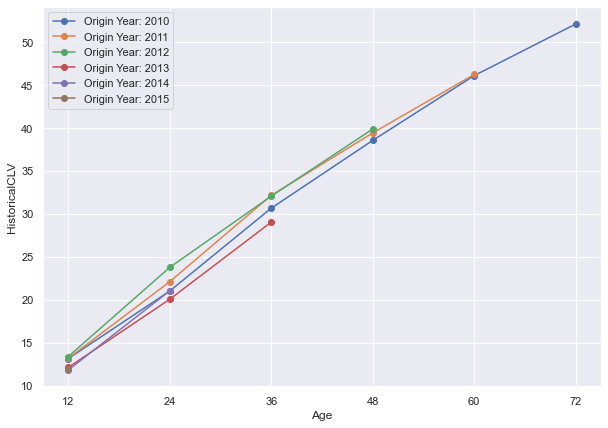

In [364]:
plt.plot(Historic_CLV_2010,marker='o',label='Origin Year: 2010')
plt.plot(Historic_CLV_2011,marker='o',label='Origin Year: 2011')
plt.plot(Historic_CLV_2012,marker='o',label='Origin Year: 2012')
plt.plot(Historic_CLV_2013,marker='o',label='Origin Year: 2013')
plt.plot(Historic_CLV_2014,marker='o',label='Origin Year: 2014')
plt.plot(Historic_CLV_2015,marker='o',label='Origin Year: 2015')

x = [12, 24, 36, 48, 60, 72]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.xlabel("Age")
plt.ylabel("HistoricalCLV")
plt.legend()

plt.gcf().set_size_inches(10, 7)

In [398]:
weighted_HCLV_12=(Historic_CLV_2010[0]*Origin_2010_New_Cust[0] + Historic_CLV_2011[0]*Origin_2011_New_Cust[0] + Historic_CLV_2012[0]*Origin_2012_New_Cust[0] + Historic_CLV_2013[0]*Origin_2013_New_Cust[0] + Historic_CLV_2014[0]*Origin_2014_New_Cust[0] + Historic_CLV_2015[0]*Origin_2015_New_Cust[0])/(Origin_2010_New_Cust[0] + Origin_2011_New_Cust[0] + Origin_2012_New_Cust[0]+ Origin_2013_New_Cust[0] + Origin_2014_New_Cust[0] + Origin_2015_New_Cust[0])
weighted_HCLV_24=(Historic_CLV_2010[1]*Origin_2010_New_Cust[1] + Historic_CLV_2011[1]*Origin_2011_New_Cust[1] + Historic_CLV_2012[1]*Origin_2012_New_Cust[1] + Historic_CLV_2013[1]*Origin_2013_New_Cust[1] + Historic_CLV_2014[1]*Origin_2014_New_Cust[1])/(Origin_2010_New_Cust[1] + Origin_2011_New_Cust[1] + Origin_2012_New_Cust[1]+ Origin_2013_New_Cust[1] + Origin_2014_New_Cust[1])
weighted_HCLV_36=(Historic_CLV_2010[2]*Origin_2010_New_Cust[2] + Historic_CLV_2011[2]*Origin_2011_New_Cust[2] + Historic_CLV_2012[2]*Origin_2012_New_Cust[2] + Historic_CLV_2013[2]*Origin_2013_New_Cust[2])/(Origin_2010_New_Cust[2] + Origin_2011_New_Cust[2] + Origin_2012_New_Cust[2]+ Origin_2013_New_Cust[2])
weighted_HCLV_48=(Historic_CLV_2010[3]*Origin_2010_New_Cust[3] + Historic_CLV_2011[3]*Origin_2011_New_Cust[3] + Historic_CLV_2012[3]*Origin_2012_New_Cust[3])/(Origin_2010_New_Cust[3] + Origin_2011_New_Cust[3] + Origin_2012_New_Cust[3])
weighted_HCLV_60=(Historic_CLV_2010[4]*Origin_2010_New_Cust[4] + Historic_CLV_2011[4]*Origin_2011_New_Cust[4])/(Origin_2010_New_Cust[4] + Origin_2011_New_Cust[4])
weighted_HCLV_72=(Historic_CLV_2010[5]*Origin_2010_New_Cust[5])/(Origin_2010_New_Cust[5])

In [399]:
print('\033[1m' + "Age  " + '\033[0m' , "  " +'\033[1m' + "HistoricCLV" + '\033[0m')
print("12      ","{:.2f}".format(weighted_HCLV_12))
print("24      ", "{:.2f}".format(weighted_HCLV_24))
print("36      ", "{:.2f}".format(weighted_HCLV_36))
print("48      ","{:.2f}".format(weighted_HCLV_48))
print("60      ", "{:.2f}".format(weighted_HCLV_60))
print("72      ", "{:.2f}".format(weighted_HCLV_72))

Age     HistoricCLV
12       12.60
24       21.57
36       30.94
48       39.28
60       46.18
72       52.12


## Step 7: Interpreting Results

### How much have customers acquired in 2011 spent to date? 

Customers acquired in 2011 have been active for 60 months (5 years) now. Referring to the table computed in Step 4, we can infer that cumulatively, they have spent approx. 7,862 USD to date. Individually, customers acquired in 2011 have spent $46.25 (per customer) to date.

### Do each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?